In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [0]:
data_region_details = pd.read_csv('/content/region_details.csv')
data_state = pd.read_csv('/content/state_level_latest.csv')

In [288]:
data_state.columns

Index(['state', 'statecode', 'lastupdatedtime', 'confirmed', 'active',
       'deaths', 'recovered', 'deltaconfirmed', 'deltadeaths',
       'deltarecovered', 'statenotes'],
      dtype='object')

In [0]:
data_state = data_state[['state','statecode','confirmed','active','deaths','recovered','deltaconfirmed', 'deltadeaths','deltarecovered']]

In [290]:
data_region_details.columns

Index(['region', 'population', 'rural_population', 'urban_population', 'area',
       'density', 'gender_ratio', 'literacy_rate', 'poverty', 'hdi'],
      dtype='object')

In [0]:
data_region = data_region_details.copy()

In [292]:
data_region.head()

,region,population,rural_population,urban_population,area,density,gender_ratio,literacy_rate,poverty,hdi
0,Andaman and Nicobar Islands,380581,237093,143488,8249,46.0,876,86.27,1.00,0.739
1,Andhra Pradesh,49577103,34966693,14610410,162968,303.0,993,67.66,9.20,0.650
2,Arunachal Pradesh,1383727,1066358,317369,83743,17.0,938,66.95,34.67,0.660
3,Assam,31205576,26807034,4398542,78438,397.0,954,73.18,31.98,0.614
4,Bihar,104099452,92341436,11758016,94163,1102.0,918,63.82,33.70,0.576


In [293]:
data_state.head()

,state,statecode,confirmed,active,deaths,recovered,deltaconfirmed,deltadeaths,deltarecovered
0,Total,TT,74925,47598,2436,24887,595,21,434
1,Maharashtra,MH,24427,18381,921,5125,0,0,0
2,Gujarat,GJ,8904,5121,537,3246,0,0,0
3,Tamil Nadu,TN,8718,6523,61,2134,0,0,0
4,Delhi,DL,7998,5034,106,2858,359,20,346


In [0]:
data_state.sort_values(by=['state'], inplace=True)

In [0]:
data_region.sort_values(by=['region'], inplace=True)

In [0]:
data_state.reset_index(drop=True, inplace=True)

In [0]:
data_region.reset_index(drop=True, inplace=True)

In [0]:
big_data = pd.merge(data_state, data_region, how='inner', left_on='state', right_on='region')

In [299]:
big_data

,state,statecode,confirmed,active,deaths,recovered,deltaconfirmed,deltadeaths,deltarecovered,region,population,rural_population,urban_population,area,density,gender_ratio,literacy_rate,poverty,hdi
0,Andaman and Nicobar Islands,AN,33,0,0,33,0,0,0,Andaman and Nicobar Islands,380581,237093,143488,8249,46.0,876,86.27,1.00,0.739
1,Andhra Pradesh,AP,2137,948,47,1142,48,1,86,Andhra Pradesh,49577103,34966693,14610410,162968,303.0,993,67.66,9.20,0.650
2,Arunachal Pradesh,AR,1,0,0,1,0,0,0,Arunachal Pradesh,1383727,1066358,317369,83743,17.0,938,66.95,34.67,0.660
3,Assam,AS,65,23,2,40,0,0,0,Assam,31205576,26807034,4398542,78438,397.0,954,73.18,31.98,0.614
4,Bihar,BR,879,491,6,382,0,0,0,Bihar,104099452,92341436,11758016,94163,1102.0,918,63.82,33.70,0.576
5,Chandigarh,CH,187,154,3,30,0,0,0,Chandigarh,1055450,28991,1026459,114,9252.0,818,86.43,21.81,0.775
6,Chhattisgarh,CT,59,6,0,53,0,0,0,Chhattisgarh,25545198,19607961,5937237,135191,189.0,991,71.04,39.93,0.613
7,Delhi,DL,7998,5034,106,2858,359,20,346,Delhi,16787941,419042,16368899,1484,11297.0,868,87.07,9.86,0.708
8,Goa,GA,7,0,0,7,0,0,0,Goa,1458545,551731,906814,3702,394.0,973,86.34,9.91,0.746
9,Gujarat,GJ,8904,5121,537,3246,0,0,0,Gujarat,60439692,34694609,25745083,196024,308.0,919,87.40,5.09,0.761


In [300]:
big_data.shape

(34, 19)

In [0]:
big_data.drop(['region'], inplace=True,axis=1)

In [0]:
from sklearn import preprocessing

x = big_data[['population','active']] #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
small_df = pd.DataFrame(x_scaled)

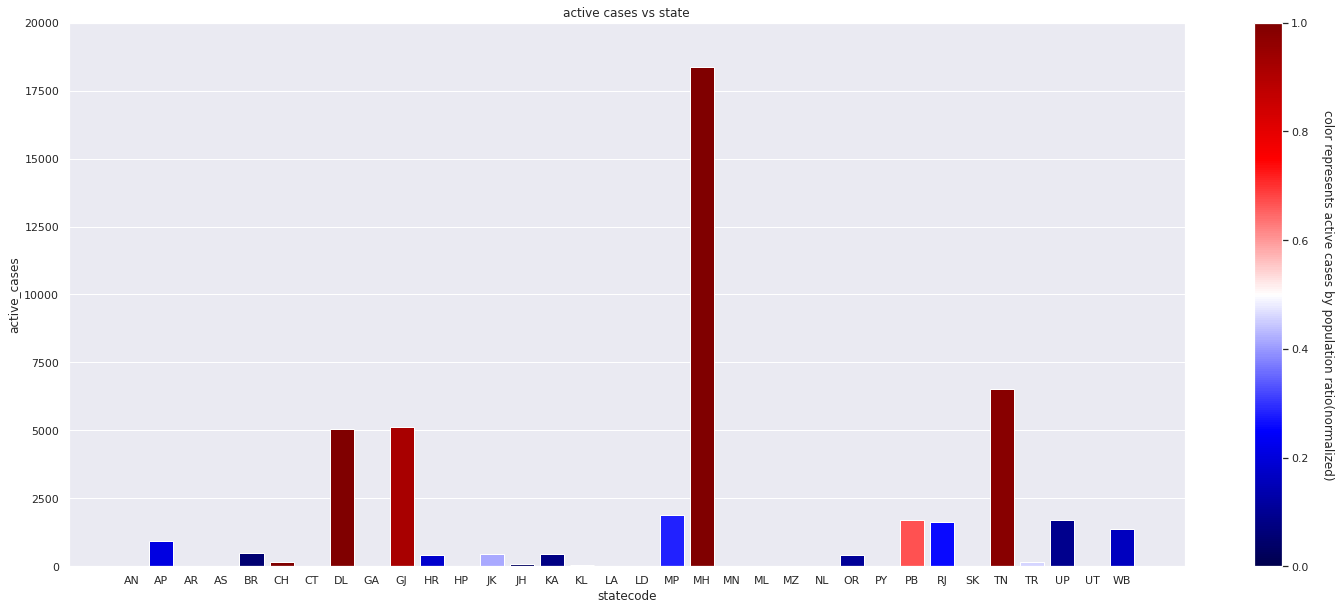

In [303]:
from matplotlib.cm import ScalarMappable
x_pos = np.arange(len(big_data))
labels = big_data['statecode']
data_color = small_df[1]/small_df[0]
my_cmap = plt.cm.get_cmap('seismic')
colors = my_cmap(data_color)
fig, ax = plt.subplots()
barlist=ax.bar(x_pos,big_data['active'],  align='center', ecolor='black', capsize=10,color=colors)
fig.set_size_inches(25, 10)
#plt.axhline(y=y, color='slategrey', linestyle='-')
ax.set_ylabel('active_cases')
ax.set_xlabel('statecode')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_ylim([0,20000])
sm = ScalarMappable(cmap=my_cmap)
sm.set_array([])
ax.set_title('active cases vs state')
cbar = plt.colorbar(sm)
cbar.set_label('color represents active cases by population ratio(normalized)', rotation=270,labelpad=25)

In [304]:
big_data.columns

Index(['state', 'statecode', 'confirmed', 'active', 'deaths', 'recovered',
       'deltaconfirmed', 'deltadeaths', 'deltarecovered', 'population',
       'rural_population', 'urban_population', 'area', 'density',
       'gender_ratio', 'literacy_rate', 'poverty', 'hdi'],
      dtype='object')

In [0]:
big_data=big_data[['state', 'statecode', 'confirmed', 'active', 'deaths', 'recovered',
       'population','density','poverty', 'hdi']]

In [306]:
big_data.head()

,state,statecode,confirmed,active,deaths,recovered,population,density,poverty,hdi
0,Andaman and Nicobar Islands,AN,33,0,0,33,380581,46.0,1.00,0.739
1,Andhra Pradesh,AP,2137,948,47,1142,49577103,303.0,9.20,0.650
2,Arunachal Pradesh,AR,1,0,0,1,1383727,17.0,34.67,0.660
3,Assam,AS,65,23,2,40,31205576,397.0,31.98,0.614
4,Bihar,BR,879,491,6,382,104099452,1102.0,33.70,0.576


In [0]:
from sklearn import preprocessing

x = big_data[['density','active']] #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
small_df_ = pd.DataFrame(x_scaled)

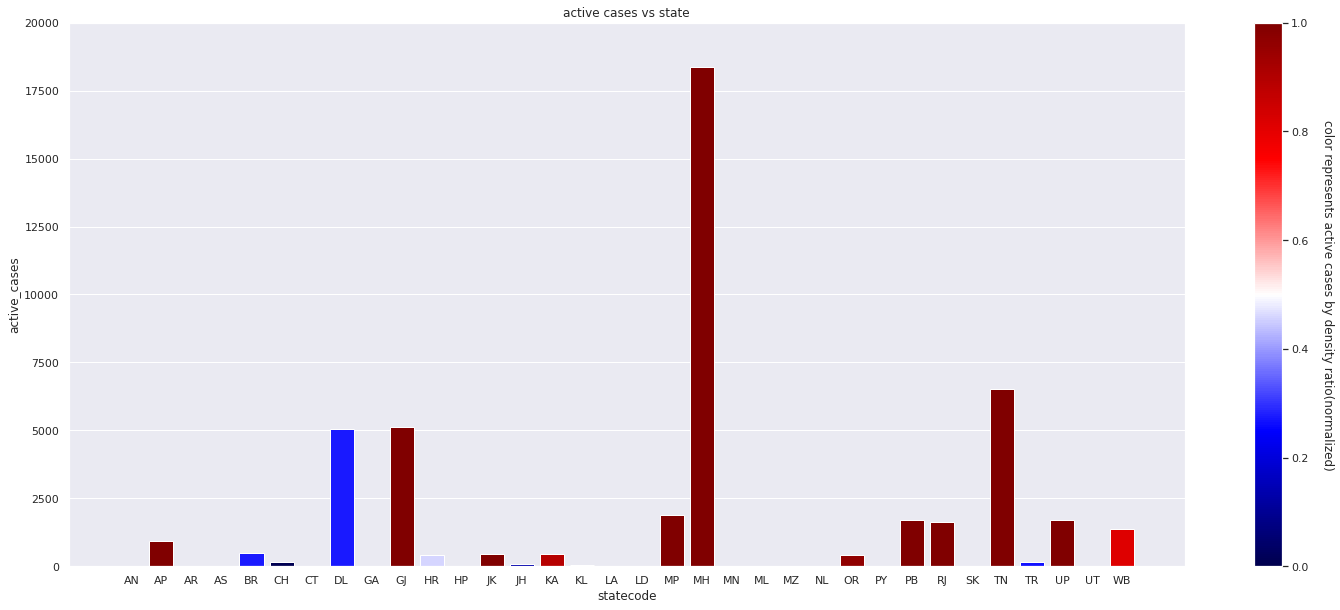

In [308]:
from matplotlib.cm import ScalarMappable
x_pos = np.arange(len(big_data))
labels = big_data['statecode']
data_color = small_df_[1]/small_df_[0]
my_cmap = plt.cm.get_cmap('seismic')
colors = my_cmap(data_color)
fig, ax = plt.subplots()
barlist=ax.bar(x_pos,big_data['active'],  align='center', ecolor='black', capsize=10,color=colors)
fig.set_size_inches(25, 10)
#plt.axhline(y=y, color='slategrey', linestyle='-')
ax.set_ylabel('active_cases')
ax.set_xlabel('statecode')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_ylim([0,20000])
sm = ScalarMappable(cmap=my_cmap)
sm.set_array([])
ax.set_title('active cases vs state')
cbar = plt.colorbar(sm)
cbar.set_label('color represents active cases by density ratio(normalized)', rotation=270,labelpad=25)

In [309]:
big_data.corr()

,confirmed,active,deaths,recovered,population,density,poverty,hdi
confirmed,1.000000,0.991664,0.917804,0.934303,0.501840,0.116215,-0.082820,0.047979
active,0.991664,1.000000,0.900106,0.881210,0.451838,0.100079,-0.084087,0.077579
deaths,0.917804,0.900106,1.000000,0.862042,0.470759,-0.022719,-0.067343,0.055679
recovered,0.934303,0.881210,0.862042,1.000000,0.596552,0.170911,-0.073164,-0.041528
population,0.501840,0.451838,0.470759,0.596552,1.000000,-0.106393,0.306372,-0.548256
density,0.116215,0.100079,-0.022719,0.170911,-0.106393,1.000000,-0.079463,0.267204
poverty,-0.082820,-0.084087,-0.067343,-0.073164,0.306372,-0.079463,1.000000,-0.724099
hdi,0.047979,0.077579,0.055679,-0.041528,-0.548256,0.267204,-0.724099,1.000000


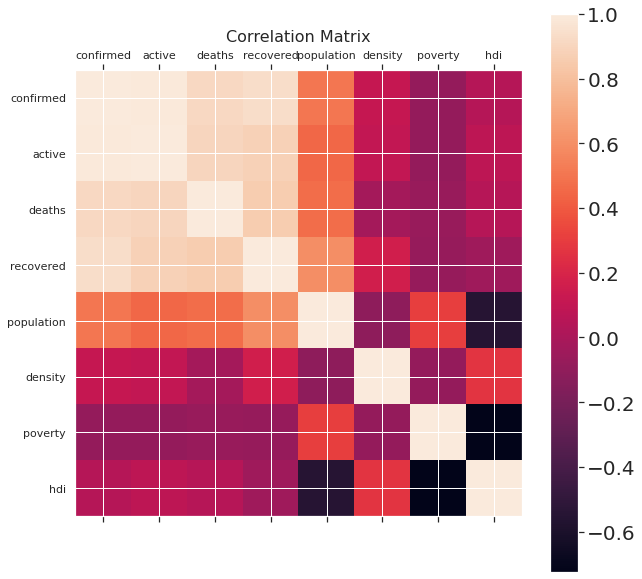

In [310]:
f = plt.figure(figsize=(10,10))
plt.matshow(big_data.corr(), fignum=f.number)
ax=f.gca()
#labels
column_labels = ['s','confirmed','active','deaths','recovered','population','density','poverty','hdi']
row_labels = ['s','confirmed','active','deaths','recovered','population','density','poverty','hdi']
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('Correlation Matrix', fontsize=16);

In [311]:
corr = big_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,confirmed,active,deaths,recovered,population,density,poverty,hdi
confirmed,1.000000,0.991664,0.917804,0.934303,0.501840,0.116215,-0.082820,0.047979
active,0.991664,1.000000,0.900106,0.881210,0.451838,0.100079,-0.084087,0.077579
deaths,0.917804,0.900106,1.000000,0.862042,0.470759,-0.022719,-0.067343,0.055679
recovered,0.934303,0.881210,0.862042,1.000000,0.596552,0.170911,-0.073164,-0.041528
population,0.501840,0.451838,0.470759,0.596552,1.000000,-0.106393,0.306372,-0.548256
density,0.116215,0.100079,-0.022719,0.170911,-0.106393,1.000000,-0.079463,0.267204
poverty,-0.082820,-0.084087,-0.067343,-0.073164,0.306372,-0.079463,1.000000,-0.724099
hdi,0.047979,0.077579,0.055679,-0.041528,-0.548256,0.267204,-0.724099,1.000000


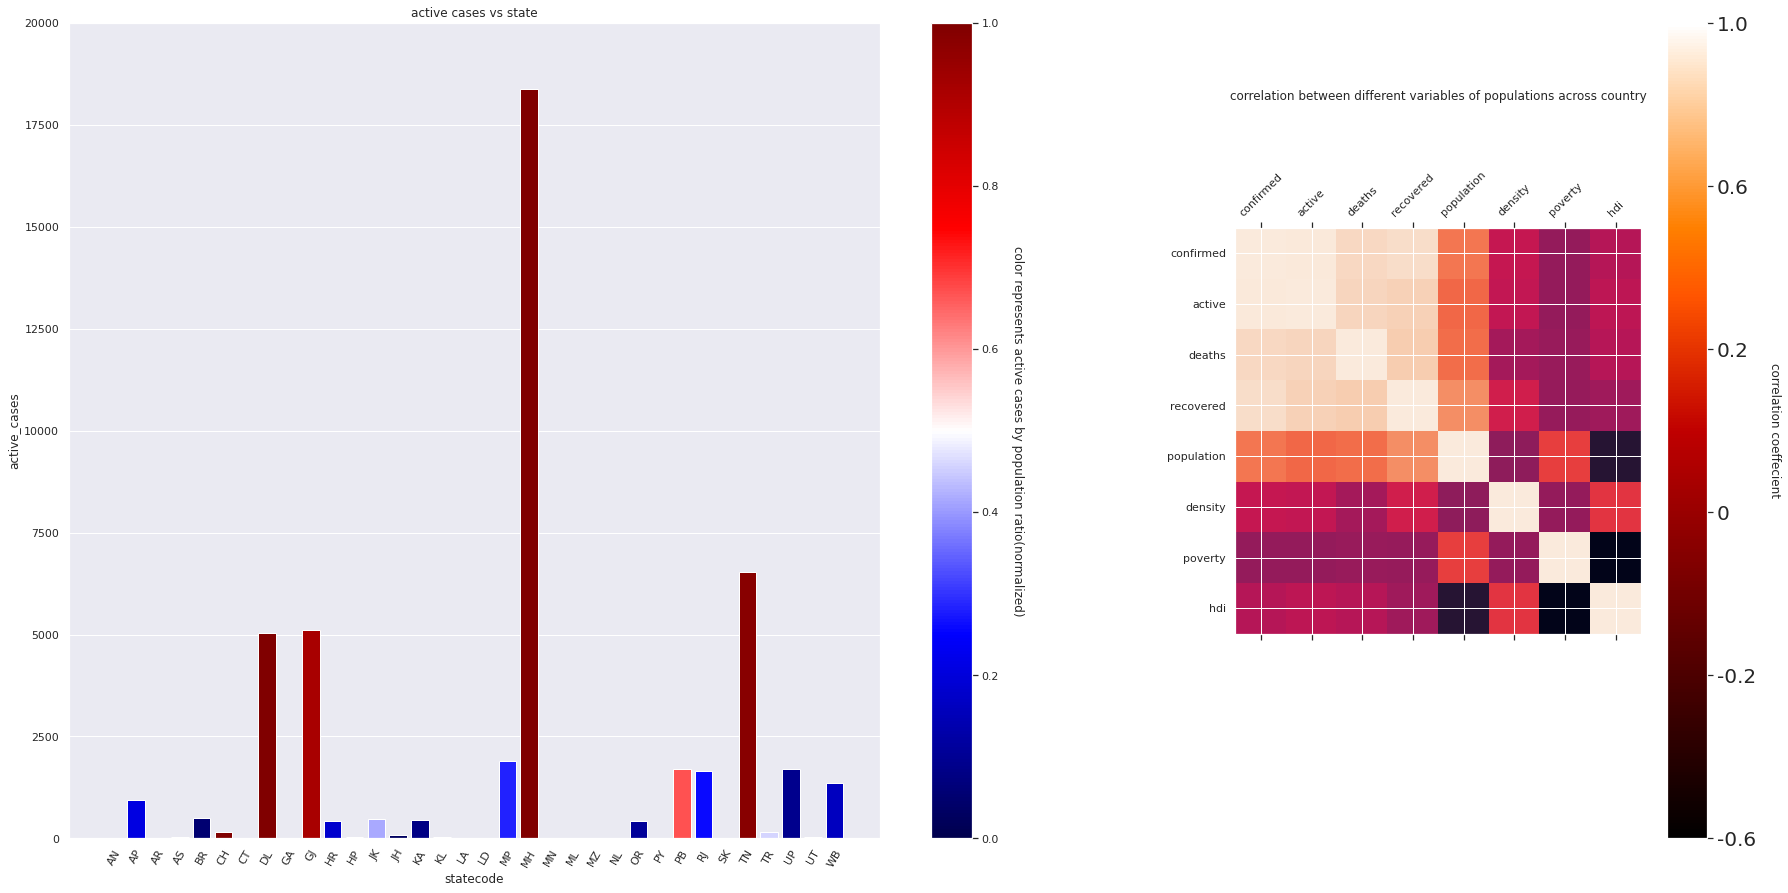

In [312]:
fig = plt.figure(figsize=(30,15))
from matplotlib import gridspec
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 
ax =plt.subplot(gs[0])
x_pos = np.arange(len(big_data))
labels = big_data['statecode']
data_color = small_df[1]/small_df[0]
my_cmap = plt.cm.get_cmap('seismic')
colors = my_cmap(data_color)
barlist=ax.bar(x_pos,big_data['active'],  align='center', ecolor='black', capsize=10,color=colors)
ax.set_ylabel('active_cases')
ax.set_xlabel('statecode')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
plt.xticks(rotation=60)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_ylim([0,20000])
sm = ScalarMappable(cmap=my_cmap)
sm.set_array([])
ax.set_title('active cases vs state')
cbar = plt.colorbar(sm)
cbar.set_label('color represents active cases by population ratio(normalized)', rotation=270,labelpad=25)


ax1 = plt.subplot(gs[1])
ax1.matshow(big_data.corr())
#labels
my_cmap = plt.cm.get_cmap('gist_heat')
column_labels = ['s','confirmed','active','deaths','recovered','population','density','poverty','hdi']
row_labels = ['s','confirmed','active','deaths','recovered','population','density','poverty','hdi']
ax1.set_xticklabels(column_labels, minor=False)
ax1.set_yticklabels(row_labels, minor=False)
figure_title = "correlation between different variables of populations across country"
plt.title(figure_title, y=1.3)
plt.xticks(rotation=45)
sm= ScalarMappable(cmap=my_cmap)
cb = plt.colorbar(sm)
cb.ax.tick_params(labelsize=20)
cb.ax.set_yticklabels(['-0.6','-0.2','0','0.2','0.6','1.0'])
cb.set_label('correlation coeffecient', rotation=270,labelpad=25)
#plt.title('Correlation Matrix', fontsize=16);

from google.colab import files
plt.savefig('test.png')
files.download('test.png')